## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [91]:
!ls "/content/drive/My Drive/AIML/Dog_breed/"

labels.csv.zip		   train.zip
sample_submission.csv.zip  vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
test.zip


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/AIML/Dog_breed/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd 
df_train=pd.read_csv('labels.csv')
df_train.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [0]:
print(df_train['breed'].value_counts())

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
golden_retriever         67
brabancon_griffon        67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64


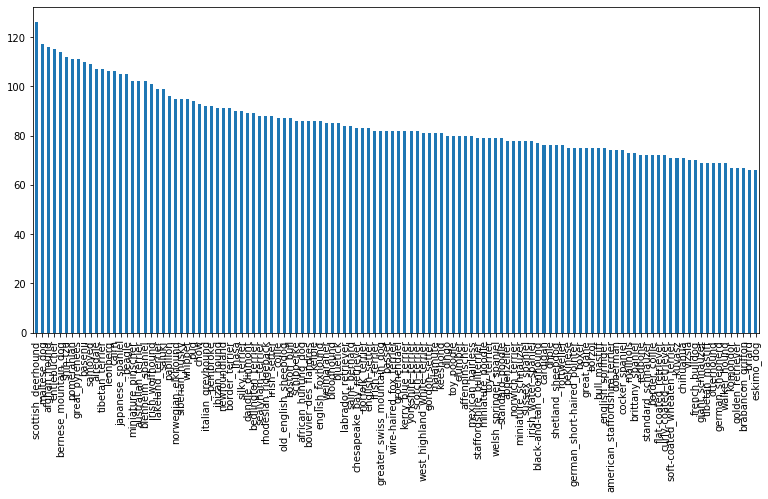

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 6))
df_train['breed'].value_counts().plot(kind='bar')
plt.show()

In [0]:
df_train.isnull().values.any()

False

In [0]:
df_train.shape

(10222, 2)

### Get one-hot encodings of labels

In [0]:
import numpy as np
targets_series_train = pd.Series(df_train['breed'])
one_hot_train = pd.get_dummies(targets_series_train, sparse = True)
one_hot_labels = np.asarray(one_hot_train)

In [0]:


one_hot_labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [99]:
from tqdm import tqdm
import cv2

img_rows = 128
img_cols = 128

x_train = []
y_train = []
i = 0 # initialisation
for f, breed in tqdm(df_train.values): 
    train_img = cv2.imread('./train/{}.jpg'.format(f))
    label = one_hot_labels[i]
    x_train.append(cv2.resize(train_img, (img_rows, img_cols)))
    y_train.append(label)
    i = i + 1
 

100%|██████████| 10222/10222 [00:30<00:00, 330.09it/s]


In [0]:
x_train2 = np.array(x_train)
y_train2 = np.array(y_train)


Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
x_train2 = x_train2.reshape(x_train2.shape[0],x_train2.shape[1], x_train2.shape[2], 3).astype('float32')

In [0]:
x_train2/=255

In [103]:
x_train2.shape

(10222, 128, 128, 3)

In [104]:
y_train2.shape

(10222, 120)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train2, y_train2, test_size=0.3, random_state=1)

In [106]:
X_train[0]

array([[[0.50980395, 0.5411765 , 0.62352943],
        [0.33333334, 0.35686275, 0.46666667],
        [0.52156866, 0.5568628 , 0.6313726 ],
        ...,
        [0.54509807, 0.5529412 , 0.5529412 ],
        [0.20784314, 0.22745098, 0.25882354],
        [0.1254902 , 0.16078432, 0.20392157]],

       [[0.44705883, 0.49411765, 0.5882353 ],
        [0.46666667, 0.5019608 , 0.59607846],
        [0.25490198, 0.2901961 , 0.34509805],
        ...,
        [0.48235294, 0.5019608 , 0.49803922],
        [0.58431375, 0.6039216 , 0.6117647 ],
        [0.33333334, 0.37254903, 0.4392157 ]],

       [[0.41568628, 0.46666667, 0.5529412 ],
        [0.5568628 , 0.5921569 , 0.6627451 ],
        [0.5568628 , 0.58431375, 0.61960787],
        ...,
        [0.44705883, 0.4745098 , 0.4862745 ],
        [0.64705884, 0.6745098 , 0.6627451 ],
        [0.45882353, 0.5019608 , 0.58431375]],

       ...,

       [[0.6313726 , 0.6509804 , 0.64705884],
        [0.6117647 , 0.6313726 , 0.627451  ],
        [0.6       , 0

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [107]:
df_test = pd.read_csv('sample_submission.csv')
test_img = df_test['id']
test_img

0        000621fb3cbb32d8935728e48679680e
1        00102ee9d8eb90812350685311fe5890
2        0012a730dfa437f5f3613fb75efcd4ce
3        001510bc8570bbeee98c8d80c8a95ec1
4        001a5f3114548acdefa3d4da05474c2e
                       ...               
10352    ffeda8623d4eee33c6d1156a2ecbfcf8
10353    fff1ec9e6e413275984966f745a313b0
10354    fff74b59b758bbbf13a5793182a9bbe4
10355    fff7d50d848e8014ac1e9172dc6762a3
10356    fffbff22c1f51e3dc80c4bf04089545b
Name: id, Length: 10357, dtype: object

Run the below code to load the test image files in x_test_feature

In [108]:
x_test_feature = []
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f))
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:31<00:00, 324.31it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
x_test  = np.array(x_test_feature)

In [110]:
x_test.shape

(10357, 128, 128, 3)

In [0]:

x_test =x_test.reshape(x_test.shape[0],x_test.shape[1], x_test.shape[2], 3).astype('float32')

In [0]:
x_test /= 255

In [113]:
x_test.shape

(10357, 128, 128, 3)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
!pip install -U tensorflow --quiet

     |████████████████████████████████| 421.8MB 33kB/s 
     |████████████████████████████████| 450kB 61.2MB/s 
     |████████████████████████████████| 3.8MB 41.5MB/s 


In [0]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [0]:

from tensorflow.keras import datasets, layers, models

tf.keras.backend.clear_session()

#Initialize Sequential model
model = models.Sequential()

# 1st Conv Layer
model.add(layers.Conv2D(32, (5, 5),input_shape=(X_train.shape[1], X_train.shape[2], 3),activation="relu"))


# 2nd Conv Layer
model.add(layers.Conv2D(32, (3, 3), activation="relu"))


# Fully Connected Layer
model.add(layers.Flatten())
model.add(layers.Dense(256))
model.add(layers.Activation("relu"))

# Prediction Layer
model.add(layers.Dense(120))
model.add(layers.Activation("softmax"))


# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
BATCH_SIZE = 128
EPOCHS = 10

In [115]:
model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
          validation_data=(X_valid, Y_valid))

Train on 7155 samples, validate on 3067 samples
Epoch 1/10
7155/7155 [==============================] - 6s 853us/sample - loss: 6.2506 - accuracy: 0.0103 - val_loss: 4.7854 - val_accuracy: 0.0137
Epoch 2/10
7155/7155 [==============================] - 5s 760us/sample - loss: 4.7514 - accuracy: 0.0310 - val_loss: 4.7526 - val_accuracy: 0.0261
Epoch 3/10
7155/7155 [==============================] - 5s 758us/sample - loss: 3.9392 - accuracy: 0.1813 - val_loss: 5.1535 - val_accuracy: 0.0264
Epoch 4/10
7155/7155 [==============================] - 5s 757us/sample - loss: 1.5020 - accuracy: 0.6748 - val_loss: 7.6521 - val_accuracy: 0.0290
Epoch 5/10
7155/7155 [==============================] - 5s 759us/sample - loss: 0.2855 - accuracy: 0.9495 - val_loss: 9.5749 - val_accuracy: 0.0235
Epoch 6/10
7155/7155 [==============================] - 5s 763us/sample - loss: 0.0969 - accuracy: 0.9881 - val_loss: 10.6964 - val_accuracy: 0.0303
Epoch 7/10
7155/7155 [==============================] - 5s 753u

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator



In [0]:
# Prepare the generator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = train_datagen.flow(X_train,Y_train, batch_size=32)
val_generator = val_datagen.flow(X_valid,Y_valid, batch_size=32)


### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [119]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=val_generator.n//val_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=val_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 223 steps, validate for 95 steps
Epoch 1/10
223/223 [==============================] - 27s 119ms/step - loss: 4.8045 - accuracy: 0.0104 - val_loss: 4.7830 - val_accuracy: 0.0138
Epoch 2/10
223/223 [==============================] - 26s 117ms/step - loss: 4.7813 - accuracy: 0.0097 - val_loss: 4.7825 - val_accuracy: 0.0138
Epoch 3/10
223/223 [==============================] - 26s 116ms/step - loss: 4.7800 - accuracy: 0.0105 - val_loss: 4.7829 - val_accuracy: 0.0138
Epoch 4/10
223/223 [==============================] - 26s 115ms/step - loss: 4.7793 - accuracy: 0.0117 - val_loss: 4.7830 - val_accuracy: 0.0138
Epoch 5/10
223/223 [==============================] - 26s 115ms/step - loss: 4.7789 - accuracy: 0.0102 - val_loss: 4.7832 - val_accuracy: 0.0138
Epoch 6/10
223/223 [==============================] - 26s 116ms/step - loss: 4.7788 - accuracy: 0.0110 - val_loss: 4.7837 - val_accuracy: 0.0138
Epoch 7/10
223/223 [=================

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
#from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [121]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
#Adding custom Layers 
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
predictions = layers.Dense(120, activation="softmax")(x)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
for layer in base_model.layers:
    layer.trainable = False


### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
from tensorflow.keras.models import Model
# creating the final model 
model_final = Model(base_model.input, predictions)

# compile the model 
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_final.compile(loss = "categorical_crossentropy",optimizer='adam', metrics=["accuracy"])



In [128]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [129]:
model_final.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
          validation_data=(X_valid, Y_valid))

Train on 7155 samples, validate on 3067 samples
Epoch 1/10
7155/7155 [==============================] - 11s 2ms/sample - loss: 4.7436 - accuracy: 0.0257 - val_loss: 4.6218 - val_accuracy: 0.0385
Epoch 2/10
7155/7155 [==============================] - 8s 1ms/sample - loss: 4.3723 - accuracy: 0.0696 - val_loss: 4.1741 - val_accuracy: 0.0809
Epoch 3/10
7155/7155 [==============================] - 8s 1ms/sample - loss: 3.8455 - accuracy: 0.1307 - val_loss: 3.7905 - val_accuracy: 0.1311
Epoch 4/10
7155/7155 [==============================] - 8s 1ms/sample - loss: 3.4750 - accuracy: 0.1802 - val_loss: 3.5639 - val_accuracy: 0.1457
Epoch 5/10
7155/7155 [==============================] - 8s 1ms/sample - loss: 3.2382 - accuracy: 0.2190 - val_loss: 3.4635 - val_accuracy: 0.1689
Epoch 6/10
7155/7155 [==============================] - 8s 1ms/sample - loss: 3.0543 - accuracy: 0.2549 - val_loss: 3.3601 - val_accuracy: 0.1920
Epoch 7/10
7155/7155 [==============================] - 8s 1ms/sample - los